In [51]:
# Reciprocal space discretization    
L = [20,20]
Kx::Vector{Float64} = [kx for kx in -1:2/L[1]:1]
pop!(Kx)
Ky::Vector{Float64} = [ky for ky in -1:2/L[2]:1]
pop!(Ky)
K::Matrix{Vector{Float64}} = [ [kx,ky] for kx in Kx, ky in Ky ]

20×20 Matrix{Vector{Float64}}:
 [-1.0, -1.0]  [-1.0, -0.9]  [-1.0, -0.8]  …  [-1.0, 0.8]  [-1.0, 0.9]
 [-0.9, -1.0]  [-0.9, -0.9]  [-0.9, -0.8]     [-0.9, 0.8]  [-0.9, 0.9]
 [-0.8, -1.0]  [-0.8, -0.9]  [-0.8, -0.8]     [-0.8, 0.8]  [-0.8, 0.9]
 [-0.7, -1.0]  [-0.7, -0.9]  [-0.7, -0.8]     [-0.7, 0.8]  [-0.7, 0.9]
 [-0.6, -1.0]  [-0.6, -0.9]  [-0.6, -0.8]     [-0.6, 0.8]  [-0.6, 0.9]
 [-0.5, -1.0]  [-0.5, -0.9]  [-0.5, -0.8]  …  [-0.5, 0.8]  [-0.5, 0.9]
 [-0.4, -1.0]  [-0.4, -0.9]  [-0.4, -0.8]     [-0.4, 0.8]  [-0.4, 0.9]
 [-0.3, -1.0]  [-0.3, -0.9]  [-0.3, -0.8]     [-0.3, 0.8]  [-0.3, 0.9]
 [-0.2, -1.0]  [-0.2, -0.9]  [-0.2, -0.8]     [-0.2, 0.8]  [-0.2, 0.9]
 [-0.1, -1.0]  [-0.1, -0.9]  [-0.1, -0.8]     [-0.1, 0.8]  [-0.1, 0.9]
 [0.0, -1.0]   [0.0, -0.9]   [0.0, -0.8]   …  [0.0, 0.8]   [0.0, 0.9]
 [0.1, -1.0]   [0.1, -0.9]   [0.1, -0.8]      [0.1, 0.8]   [0.1, 0.9]
 [0.2, -1.0]   [0.2, -0.9]   [0.2, -0.8]      [0.2, 0.8]   [0.2, 0.9]
 [0.3, -1.0]   [0.3, -0.9]   [0.3, -0.8]      [0.

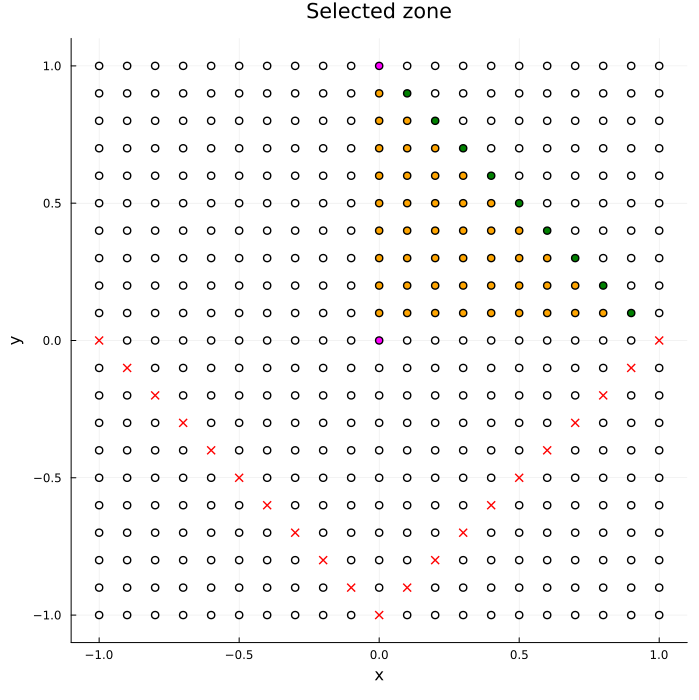

In [8]:
using Plots
plot(
    xlabel='x',
    ylabel='y',
    xlim=(-1.1,1.1),
    ylim=(-1.1,1.1),
)
for i in 1:length(K)
    myColor="white"
    myMarker=:circle
    kx, ky = K[i]
    if abs(kx) - ky == 1
        myColor="red"
        myMarker=:x
    elseif kx>=0 && ky>0 && kx+ky<1
        myColor="orange"
    elseif kx+ky==1 && (kx!=1 && ky!=1)
        myColor="green"
    elseif kx==0 && (ky==0 || ky==1)
        myColor="magenta"
    end
    #if abs(kx) + abs(ky) <= 1 # && abs(kx) - ky < 1
        scatter!(
            [ kx ], [ ky ],
            label="",
            color=myColor,
            markershape=myMarker
        )
    #end
end
plot!(
    title="Selected zone",
    size=(700,700),
)

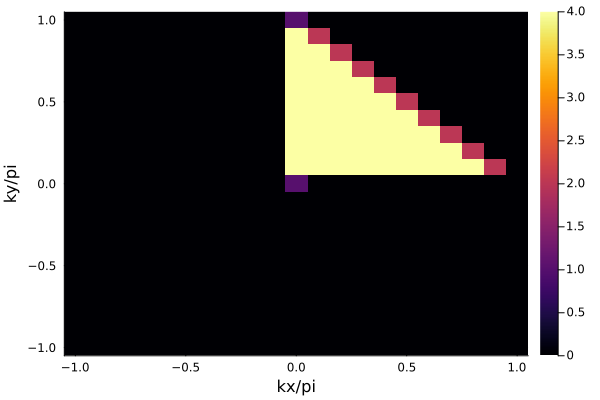

In [37]:
function GetWeight(
    k::Vector{Float64}
)
    wk::Int64 = 0
    kx, ky = k
    if kx>=0 && ky>0 && kx+ky<1
        wk = 4
    elseif kx+ky==1 && (kx!=1 && ky!=1)
        wk = 2
    elseif kx==0 && (ky==0 || ky==1)
        wk = 1
    end
    return wk
end

heatmap(
    Kx, Ky, GetWeight.(reverse.(K)),
    xlabel="kx/pi", ylabel="ky/pi"
)

In [53]:
KK = K.*pi
[ cos.(k) for k in K ]

20×20 Matrix{Vector{Float64}}:
 [0.540302, 0.540302]  [0.540302, 0.62161]  …  [0.540302, 0.62161]
 [0.62161, 0.540302]   [0.62161, 0.62161]      [0.62161, 0.62161]
 [0.696707, 0.540302]  [0.696707, 0.62161]     [0.696707, 0.62161]
 [0.764842, 0.540302]  [0.764842, 0.62161]     [0.764842, 0.62161]
 [0.825336, 0.540302]  [0.825336, 0.62161]     [0.825336, 0.62161]
 [0.877583, 0.540302]  [0.877583, 0.62161]  …  [0.877583, 0.62161]
 [0.921061, 0.540302]  [0.921061, 0.62161]     [0.921061, 0.62161]
 [0.955336, 0.540302]  [0.955336, 0.62161]     [0.955336, 0.62161]
 [0.980067, 0.540302]  [0.980067, 0.62161]     [0.980067, 0.62161]
 [0.995004, 0.540302]  [0.995004, 0.62161]     [0.995004, 0.62161]
 [1.0, 0.540302]       [1.0, 0.62161]       …  [1.0, 0.62161]
 [0.995004, 0.540302]  [0.995004, 0.62161]     [0.995004, 0.62161]
 [0.980067, 0.540302]  [0.980067, 0.62161]     [0.980067, 0.62161]
 [0.955336, 0.540302]  [0.955336, 0.62161]     [0.955336, 0.62161]
 [0.921061, 0.540302]  [0.921061, 0.6